In [29]:
# Heart Disease Clustering Project using K-Means

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from itertools import combinations
import warnings
warnings.filterwarnings("ignore")


# Step 2: Load Dataset
df = pd.read_csv("heart_disease.csv")

In [30]:
# Step 3: Basic Data Info
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
dtypes: float64(5), int64(2), object(8)
memory usage: 107.9+ KB
None
               id         age    trestbps        chol      thalch     oldpeak  \
count  920.000000  920.000000  861.000000  890.000000  865.000000  858.000000   
m

In [31]:
# Step 4: Drop rows with missing values
df = df.dropna()

# Step 5: Select only numeric columns and drop 'id' if present
df = df.select_dtypes(include=[np.number])
if 'id' in df.columns:
    df = df.drop(columns=['id'])

# Step 6: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

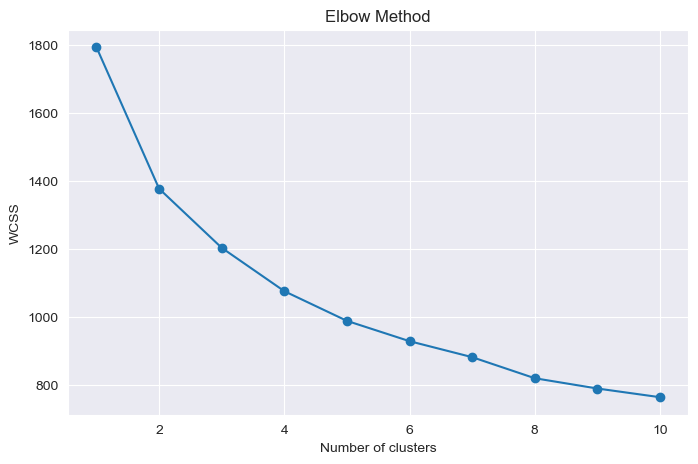

In [32]:
# Step 7: Elbow Method to find optimal clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [33]:
# Step 8: KMeans Clustering (Assuming 3 clusters based on Elbow)
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)
df['Cluster'] = y_kmeans

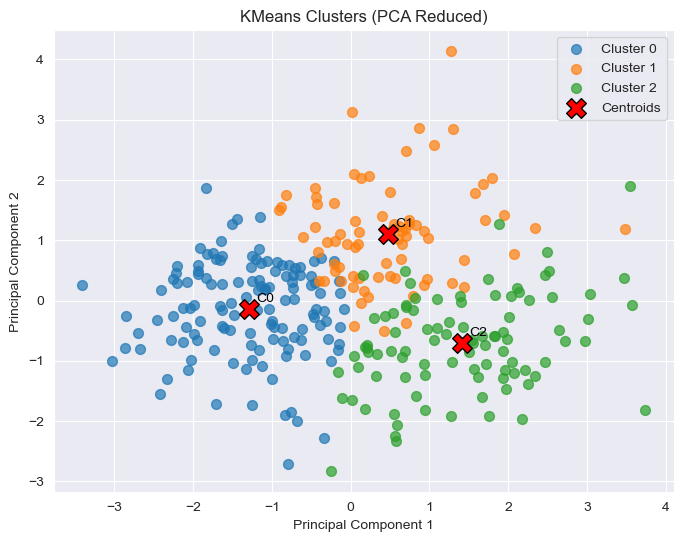

In [34]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Transform cluster centers to PCA space
centroids_pca = pca.transform(kmeans.cluster_centers_)

# Plot
plt.figure(figsize=(8, 6))

# Plot each cluster with label
for cluster_num in np.unique(y_kmeans):
    plt.scatter(
        X_pca[y_kmeans == cluster_num, 0],
        X_pca[y_kmeans == cluster_num, 1],
        label=f"Cluster {cluster_num}",
        s=50, alpha=0.7
    )

# Plot centroids
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1],
            c='red', marker='X', s=200, edgecolor='black', label='Centroids')

# Annotate centroid numbers
for idx, (x, y) in enumerate(centroids_pca):
    plt.annotate(f'C{idx}', (x, y), textcoords="offset points", xytext=(5, 5),
                 ha='left', fontsize=10, color='black')

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("KMeans Clusters (PCA Reduced)")
plt.legend()
plt.grid(True)
plt.show()


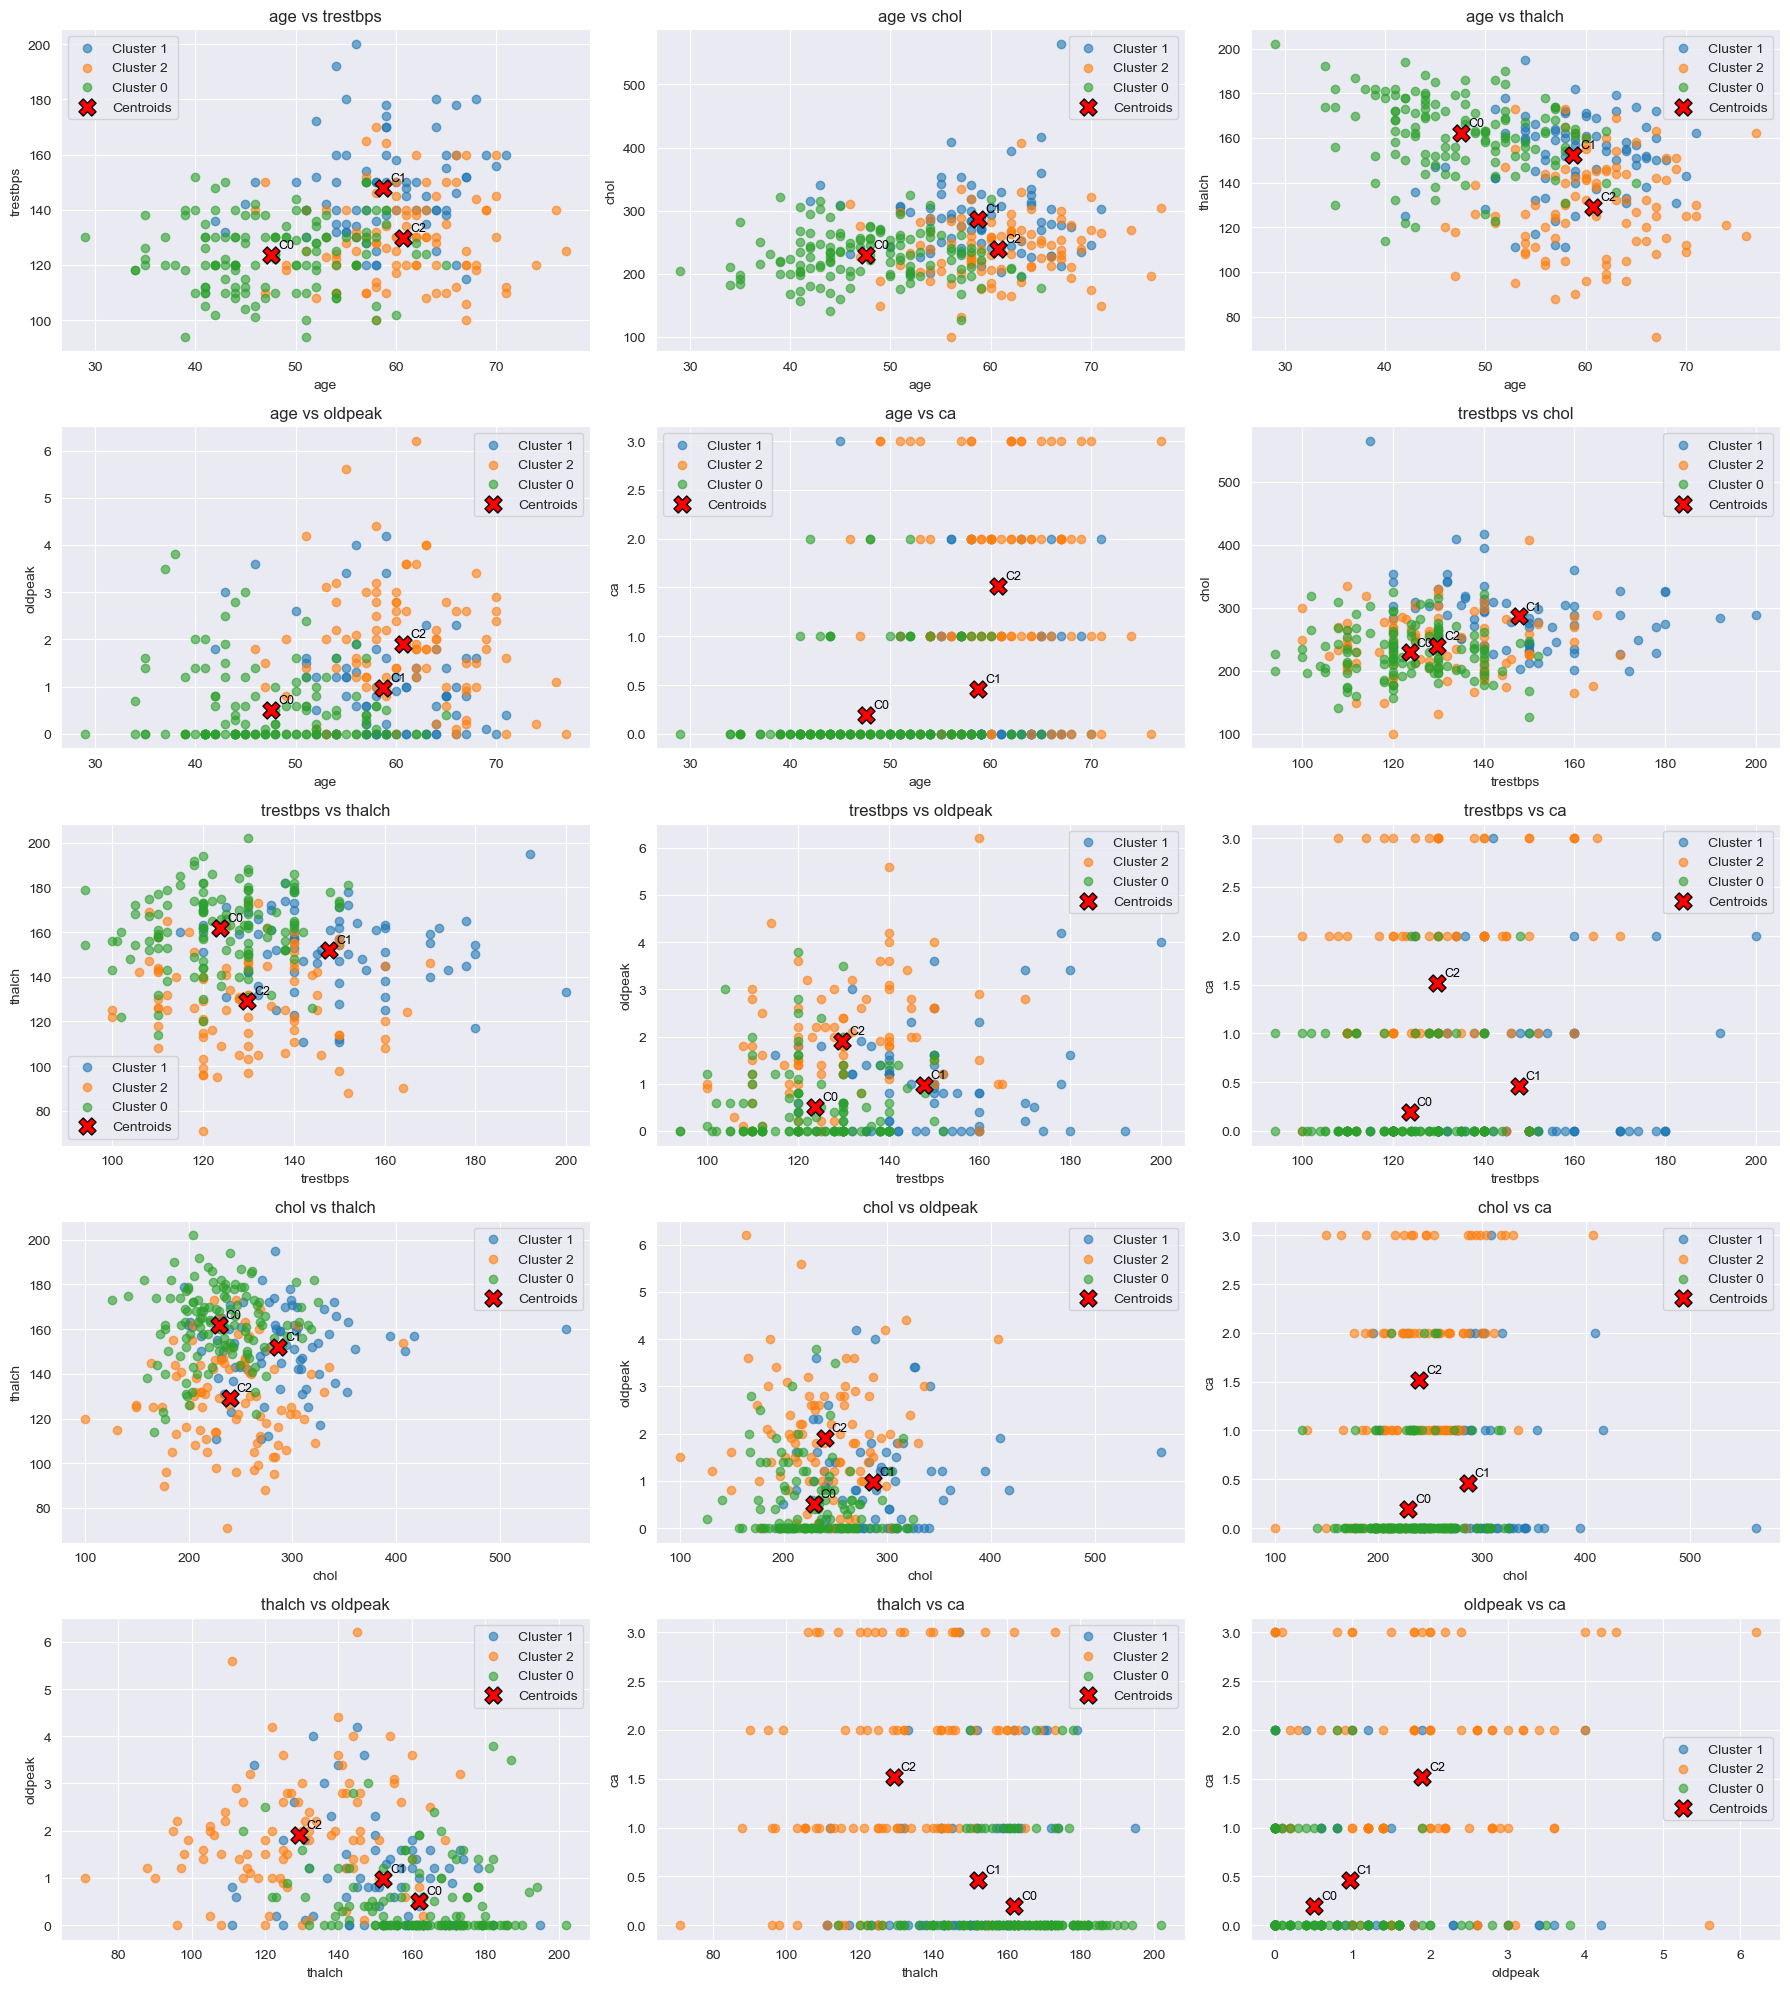

In [35]:
from sklearn.preprocessing import StandardScaler
from itertools import combinations

# Get the features (excluding 'Cluster')
features = df.columns.drop('Cluster')
pairs = list(combinations(features, 2))

# Inverse transform the cluster centers to original feature space
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroid_df = pd.DataFrame(centroids, columns=features)

# Plotting
rows = (len(pairs) + 2) // 3
fig, axs = plt.subplots(nrows=rows, ncols=3, figsize=(18, rows * 4))
axs = axs.ravel()

for i, (x, y) in enumerate(pairs):
    for cluster in df['Cluster'].unique():
        cluster_data = df[df['Cluster'] == cluster]
        axs[i].scatter(cluster_data[x], cluster_data[y], label=f'Cluster {cluster}', alpha=0.6)

    # Plot centroids with cluster number annotation
    axs[i].scatter(centroid_df[x], centroid_df[y],
                   c='red', marker='X', s=150, edgecolor='black', label='Centroids')

    for idx, row in centroid_df.iterrows():
        axs[i].annotate(f'C{idx}', (row[x], row[y]), textcoords="offset points", xytext=(5,5), ha='left', fontsize=9, color='black')

    axs[i].set_xlabel(x)
    axs[i].set_ylabel(y)
    axs[i].set_title(f"{x} vs {y}")
    axs[i].legend()
    axs[i].grid(True)

# Hide unused subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()
